In [1]:
pwd

'/home/alex/gargaml/examples'

In [2]:
cd ..


/home/alex/gargaml


In [3]:
import gargaml
from gargaml import *
from gargaml import Data

In [27]:
X, y  = Data().Load.titanic(True, precleaning=True)
X

,sex,embarked,passengerid,pclass,age,sibsp,parch,fare
0,male,S,1,3,22.0,1,0,7.2500
1,female,C,2,1,38.0,1,0,71.2833
2,female,S,3,3,26.0,0,0,7.9250
3,female,S,4,1,35.0,1,0,53.1000
4,male,S,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,male,S,887,2,27.0,0,0,13.0000
887,female,S,888,1,19.0,0,0,30.0000
888,female,S,889,3,NaN,1,2,23.4500
889,male,C,890,1,26.0,0,0,30.0000


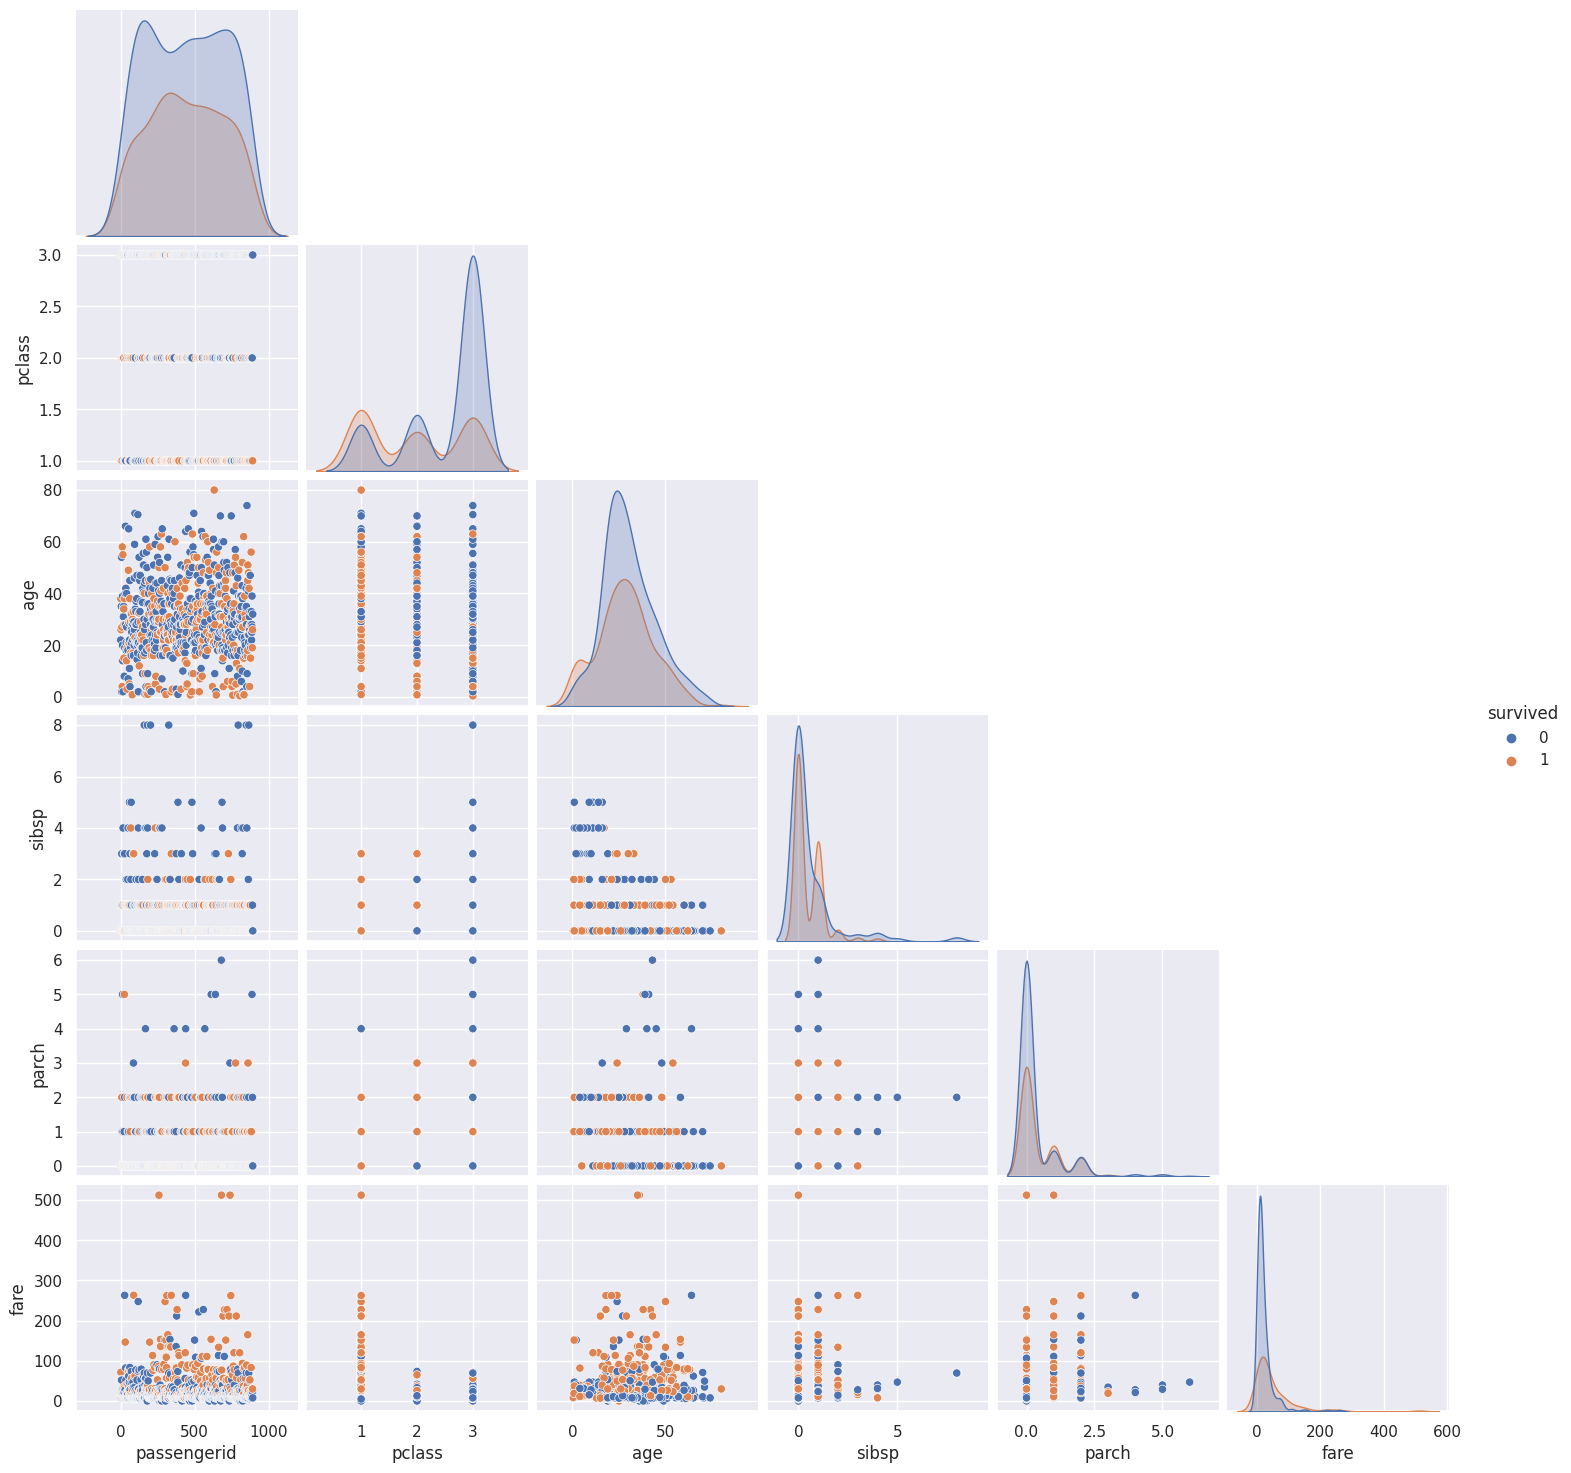

In [16]:
sns.pairplot(df, hue="survived", corner=True)

In [21]:
px.box(df, x="survived", y="fare")

In [23]:
px.box(df, x="survived", y="pclass")

In [26]:
px.box(df, x="survived", y="age", color="sex")

In [28]:
X.drop(columns="passengerid", inplace=True)
X.sample(10)

,sex,embarked,pclass,age,sibsp,parch,fare
377,male,C,1,27.0,0,2,211.5000
385,male,S,2,18.0,0,0,73.5000
162,male,S,3,26.0,0,0,7.7750
18,female,S,3,31.0,1,0,18.0000
336,male,S,1,29.0,1,0,66.6000
873,male,S,3,47.0,0,0,9.0000
500,male,S,3,17.0,0,0,8.6625
317,male,S,2,54.0,0,0,14.0000
693,male,C,3,25.0,0,0,7.2250
796,female,S,1,49.0,0,0,25.9292


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [30]:
y.value_counts(normalize=True).round(2)

survived
0    0.62
1    0.38
Name: proportion, dtype: float64

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   embarked  889 non-null    object 
 2   pclass    891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


<Axes: >

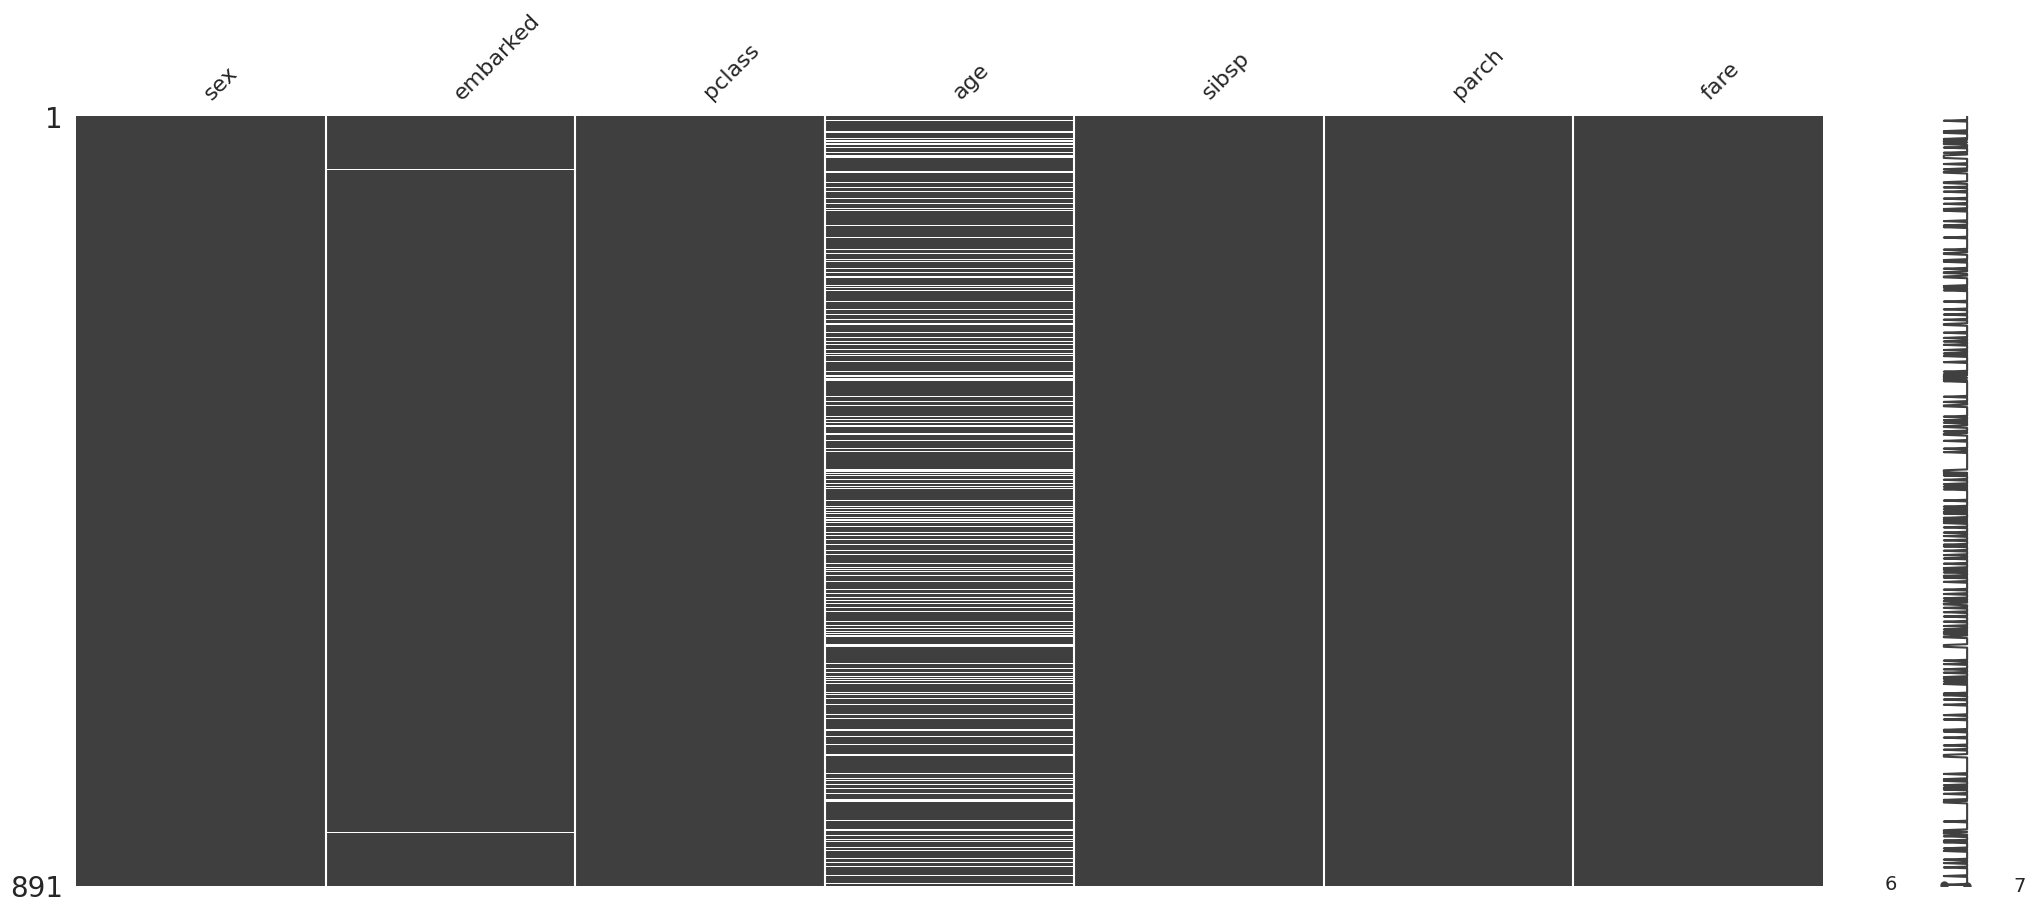

In [46]:
msno.matrix(X)

In [47]:
# viert pret à 0



virer total amont/anuity  / target => NAN
virer total amont/anuity  => 0 




# feat eng.
df_amout_rate = df.toal_amount / df.annuity
df_salary_rate = df.toal_amount / df.salary 
df_annuity_rate =  df.annuity / df.Salary 

,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
count,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,2.391841,25.046650,0.016835,0.198653
std,0.836071,14.526497,1.102743,0.806057,49.693429,8.115102,51.245594,0.128725,0.399210
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.342403,2.641667,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.565217,6.325000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.673857,23.183333,0.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,164.728261,512.329200,1.000000,1.000000


In [ ]:
X["fare_by_age"] = X.fare/ X.age
X["fare_by_pclass"] = X.fare/X.pclass 
X["fare_null"] = (X.fare == 0).astype(int)
X["age_is_nan"] = X.age.isna().astype(int)
X.describe()

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [49]:
X

,sex,embarked,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
0,male,S,3,22.0,1,0,7.2500,0.329545,2.416667,0,0
1,female,C,1,38.0,1,0,71.2833,1.875876,71.283300,0,0
2,female,S,3,26.0,0,0,7.9250,0.304808,2.641667,0,0
3,female,S,1,35.0,1,0,53.1000,1.517143,53.100000,0,0
4,male,S,3,35.0,0,0,8.0500,0.230000,2.683333,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000,0.481481,6.500000,0,0
887,female,S,1,19.0,0,0,30.0000,1.578947,30.000000,0,0
888,female,S,3,NaN,1,2,23.4500,NaN,7.816667,0,1
889,male,C,1,26.0,0,0,30.0000,1.153846,30.000000,0,0


In [64]:
detector = EllipticEnvelope()
tmp = X.select_dtypes(np.number)
tmp =KNNImputer().fit_transform(tmp)
ee = detector.fit_predict(tmp)
ee = pd.Series(ee, name="is_outlier")

In [65]:
ee.value_counts(normalize=True).round(2
                                      )

is_outlier
 1    0.9
-1    0.1
Name: proportion, dtype: float64

In [66]:
ee = ee.apply(lambda i : False if i==1 else True)
ee

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: is_outlier, Length: 891, dtype: bool

In [67]:
ee.value_counts()

is_outlier
False    801
True      90
Name: count, dtype: int64

In [76]:
X["algorithmic_outlier"] = ee.values.astype(int)
X

,sex,embarked,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan,algorithmic_outlier
0,male,S,3,22.0,1,0,7.2500,0.329545,2.416667,0,0,0
1,female,C,1,38.0,1,0,71.2833,1.875876,71.283300,0,0,0
2,female,S,3,26.0,0,0,7.9250,0.304808,2.641667,0,0,0
3,female,S,1,35.0,1,0,53.1000,1.517143,53.100000,0,0,0
4,male,S,3,35.0,0,0,8.0500,0.230000,2.683333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000,0.481481,6.500000,0,0,0
887,female,S,1,19.0,0,0,30.0000,1.578947,30.000000,0,0,0
888,female,S,3,NaN,1,2,23.4500,NaN,7.816667,0,1,0
889,male,C,1,26.0,0,0,30.0000,1.153846,30.000000,0,0,0


In [69]:
X_1.describe().astype(int)

,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
count,90,79,90,90,90,79,90,90,90
mean,2,12,1,1,98,14,88,0,0
std,0,14,1,0,114,20,120,0,0
min,1,0,0,0,7,2,2,0,0
25%,1,2,0,1,23,5,8,0,0
50%,2,5,1,1,34,8,13,0,0
75%,3,18,3,2,151,14,151,0,0
max,3,64,5,4,512,164,512,0,1


In [72]:
X_2 = X.loc[~ee.values]
X_2

,sex,embarked,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
0,male,S,3,22.0,1,0,7.2500,0.329545,2.416667,0,0
1,female,C,1,38.0,1,0,71.2833,1.875876,71.283300,0,0
2,female,S,3,26.0,0,0,7.9250,0.304808,2.641667,0,0
3,female,S,1,35.0,1,0,53.1000,1.517143,53.100000,0,0
4,male,S,3,35.0,0,0,8.0500,0.230000,2.683333,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000,0.481481,6.500000,0,0
887,female,S,1,19.0,0,0,30.0000,1.578947,30.000000,0,0
888,female,S,3,NaN,1,2,23.4500,NaN,7.816667,0,1
889,male,C,1,26.0,0,0,30.0000,1.153846,30.000000,0,0


In [73]:
X_2.describe().astype(int)

,pclass,age,sibsp,parch,fare,fare_by_age,fare_by_pclass,fare_null,age_is_nan
count,801,635,801,801,801,635,801,801,801
mean,2,31,0,0,24,0,17,0,0
std,0,12,0,0,27,0,28,0,0
min,1,4,0,0,0,0,0,0,0
25%,2,22,0,0,7,0,2,0,0
50%,3,30,0,0,13,0,5,0,0
75%,3,39,1,0,27,1,18,0,0
max,3,80,8,6,164,5,164,1,1


In [ ]:
del X_1

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
X_train

,sex,embarked,pclass,age,sibsp,parch,fare
498,female,S,1,25.0,1,2,151.5500
857,male,S,1,51.0,0,0,26.5500
664,male,S,3,20.0,1,0,7.9250
309,female,C,1,30.0,0,0,56.9292
494,male,S,3,21.0,0,0,8.0500
...,...,...,...,...,...,...,...
742,female,C,1,21.0,2,2,262.3750
286,male,S,3,30.0,0,0,9.5000
699,male,S,3,42.0,0,0,7.6500
473,female,C,2,23.0,0,0,13.7917


In [34]:
X_test

,sex,embarked,pclass,age,sibsp,parch,fare
111,female,C,3,14.5,1,0,14.4542
42,male,C,3,NaN,0,0,7.8958
796,female,S,1,49.0,0,0,25.9292
126,male,Q,3,NaN,0,0,7.7500
887,female,S,1,19.0,0,0,30.0000
...,...,...,...,...,...,...,...
379,male,S,3,19.0,0,0,7.7750
701,male,S,1,35.0,0,0,26.2875
624,male,S,3,21.0,0,0,16.1000
402,female,S,3,21.0,1,0,9.8250


In [35]:
X_train.isna().mean().round(4)

sex         0.0000
embarked    0.0016
pclass      0.0000
age         0.1974
sibsp       0.0000
parch       0.0000
fare        0.0000
dtype: float64

In [36]:
y_train

498    0
857    1
664    1
309    1
494    0
      ..
742    1
286    1
699    0
473    1
888    0
Name: survived, Length: 623, dtype: int64

In [37]:
imputer = KNNImputer()

cols = X_train.select_dtypes(include=np.number).columns
display(cols)

imputer.fit(X_train.select_dtypes(include=np.number))
X_train = imputer.transform(X_train.select_dtypes(include=np.number))

# X_train = imputer.fit_transform(X_train.select_dtypes(include=np.number))
X_test = imputer.transform(X_test.select_dtypes(include=np.number))
X_train





Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

array([[  1.    ,  25.    ,   1.    ,   2.    , 151.55  ],
       [  1.    ,  51.    ,   0.    ,   0.    ,  26.55  ],
       [  3.    ,  20.    ,   1.    ,   0.    ,   7.925 ],
       ...,
       [  3.    ,  42.    ,   0.    ,   0.    ,   7.65  ],
       [  2.    ,  23.    ,   0.    ,   0.    ,  13.7917],
       [  3.    ,  26.8   ,   1.    ,   2.    ,  23.45  ]])

In [ ]:
X_train.shape

In [38]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
X_train

,pclass,age,sibsp,parch,fare
0,1.0,25.0,1.0,2.0,151.5500
1,1.0,51.0,0.0,0.0,26.5500
2,3.0,20.0,1.0,0.0,7.9250
3,1.0,30.0,0.0,0.0,56.9292
4,3.0,21.0,0.0,0.0,8.0500
...,...,...,...,...,...
618,1.0,21.0,2.0,2.0,262.3750
619,3.0,30.0,0.0,0.0,9.5000
620,3.0,42.0,0.0,0.0,7.6500
621,2.0,23.0,0.0,0.0,13.7917


In [39]:
X_train.isna().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [40]:
y_train.value_counts(normalize=True).round(2)

survived
0    0.61
1    0.39
Name: proportion, dtype: float64

In [41]:
y_test.value_counts(normalize=True).round(2)

survived
0    0.64
1    0.36
Name: proportion, dtype: float64

In [42]:
estimator = LogisticRegression()
estimator.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred_train = estimator.predict(X_train)
y_pred_train

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [ ]:
y_train

In [44]:
estimator.score(X_train, y_train).round(2)

0.7

In [45]:
estimator.score(X_test, y_test).round(2)


0.72

In [52]:
scaler = StandardScaler()  # QuantileTransformer(n_quantiles=100)
# scaler = MinMaxScaler()  # QuantileTransformer(n_quantiles=100)

# scaler.fit(X_train)
# X_train_sca = scaler.transform(X_train)
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

In [53]:
X_test_sca

array([[ 0.83690889, -1.16088829,  0.41911304, -0.49437626, -0.37622053],
       [ 0.83690889,  0.15587374, -0.47509047, -0.49437626, -0.507477  ],
       [-1.5384635 ,  1.40568177, -0.47509047, -0.49437626, -0.14656573],
       ...,
       [ 0.83690889, -0.67733161, -0.47509047, -0.49437626, -0.34328233],
       [ 0.83690889, -0.67733161,  0.41911304, -0.49437626, -0.46886698],
       [-1.5384635 ,  2.07522178, -0.47509047, -0.49437626, -0.07109887]])

In [54]:
X_train_sca = pd.DataFrame(X_train_sca, columns=cols)
X_test_sca = pd.DataFrame(X_test_sca, columns=cols)
X_train_sca

,pclass,age,sibsp,parch,fare
0,-1.538464,-0.379758,0.419113,1.893193,2.367545
1,-1.538464,1.554468,-0.475090,-0.494376,-0.134141
2,0.836909,-0.751725,0.419113,-0.494376,-0.506893
3,-1.538464,-0.007792,-0.475090,-0.494376,0.473852
4,0.836909,-0.677332,-0.475090,-0.494376,-0.504391
...,...,...,...,...,...
618,-1.538464,-0.677332,1.313317,1.893193,4.585540
619,0.836909,-0.007792,-0.475090,-0.494376,-0.475371
620,0.836909,0.884928,-0.475090,-0.494376,-0.512396
621,-0.350777,-0.528545,-0.475090,-0.494376,-0.389479


In [55]:
X_train.describe().round(1)

,pclass,age,sibsp,parch,fare
count,623.0,623.0,623.0,623.0,623.0
mean,2.3,30.1,0.5,0.4,33.3
std,0.8,13.5,1.1,0.8,50.0
min,1.0,0.7,0.0,0.0,0.0
25%,1.5,22.0,0.0,0.0,7.9
50%,3.0,29.0,0.0,0.0,14.5
75%,3.0,38.2,1.0,1.0,31.9
max,3.0,74.0,8.0,6.0,512.3


In [56]:
X_train_sca.describe().round(1)

,pclass,age,sibsp,parch,fare
count,623.0,623.0,623.0,623.0,623.0
mean,-0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.5,-2.2,-0.5,-0.5,-0.7
25%,-0.9,-0.6,-0.5,-0.5,-0.5
50%,0.8,-0.1,-0.5,-0.5,-0.4
75%,0.8,0.6,0.4,0.7,-0.0
max,0.8,3.3,6.7,6.7,9.6


In [57]:
from IPython.display import display

estimator = LinearRegression()
estimator.fit(X_train_sca, y_train)

display(estimator.score(X_train_sca, y_train).round(2))
display(estimator.score(X_test_sca, y_test).round(2))

0.18

0.14

In [ ]:
# estimator = LogisticRegression()
# estimator.fit(X_train_sca, y_train)

# display(estimator.score(X_train_sca, np.log1p(y_train).astype(int)))
# display(estimator.score(X_test_sca, np.log1p(y_test).astype(int)))

In [ ]:
y_train

In [ ]:
# np.log1p(y_train).astype(int).value_counts()

In [ ]:
grid = GridSearchCV(
    LogisticRegression(),
    {},
    cv=10, # StratifiedShuffleSplit(n_splits=10, test_size=0.3)
    n_jobs=4,
    verbose=2,
    return_train_score=True,
)
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
display(grid.score(X_train, y_train))
display(grid.score(X_test, y_test))

In [ ]:
display(grid.best_estimator_.score(X_train, y_train))
display(grid.best_estimator_.score(X_test, y_test))

In [ ]:
grid.cv_results_

In [ ]:
res = pd.DataFrame(grid.cv_results_).round(2)
res

In [ ]:
cols = [i for i in res.columns if "split" not in i]
res = res.loc[:, cols]
res

In [ ]:
def resultize(grid):
    """from a fited grid search build / return a fancy dataframe of results"""

    res = pd.DataFrame(grid.cv_results_).round(2)
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]

    res = res.sort_values("mean_test_score", ascending=False)

    return res

In [ ]:
blabla = resultize(grid)
blabla

In [ ]:
pipe = Pipeline(
    [
        # ("sampler", RandomUnderSampler()),
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler()),
        ("estimator", LogisticRegression()),
    ]
)

pipe

In [ ]:
grid = GridSearchCV(pipe, {}, cv=10, n_jobs=-1, verbose=2, return_train_score=True)
grid.fit(X.select_dtypes(include=np.number), y)

In [ ]:
resultize(grid)

In [ ]:
li = [
    # ("sampler", RandomUnderSampler()),
    ("imputer", KNNImputer()),
    ("scaler", StandardScaler()),
    ("estimator", LogisticRegression()),
]

pipe = Pipeline(
    li
)
pipe

In [ ]:
param_grid = {


    # "estimator": [LogisticRegression()],
    


    # "sampler": ["passthrough", RandomUnderSampler()],
    
    "imputer": [
        KNNImputer(),
        SimpleImputer(strategy="mean"),
        SimpleImputer(strategy="median"),
    ],
}
param_grid

In [ ]:
# def cv():
#     return StratifiedShuffleSplit(n_splits=10, test_size=0.3)

In [ ]:
N_JOBS = -1
VERBOSE = 1
CV = 10

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

In [ ]:
param_grid = {
    "estimator": [LogisticRegression(), ], # RandomForestClassifier()
    #

    # "sampler": ["passthrough", RandomUnderSampler()],
    
    "imputer": [KNNImputer(), SimpleImputer()],
    
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        MinMaxScaler(),
        "passthrough",
    ],
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

In [ ]:
param_grid = {
    # "imputer"  : [KNNImputer(), SimpleImputer()],
    # "scaler" : [StandardScaler(), Normalizer(), QuantileTransformer(n_quantiles=100), "passthrough"],  # MinMaxScaler()
    "estimator": [
        DummyClassifier(),
        LogisticRegression(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
    ]
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=CV, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid)

In [ ]:
param_grid = {
    
    # "sampler": ["passthrough", RandomUnderSampler()],

    "imputer": [KNNImputer(), SimpleImputer()],

    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],  # MinMaxScaler()
    
    "estimator": [
        LogisticRegression(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
    ],  # DummyClassifier()
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(X.select_dtypes(include=np.number), y)
resultize(grid).sort_values("mean_test_score", ascending=False).head()

In [ ]:
resultize(grid).sort_values("mean_test_score", ascending=False)

In [ ]:
pd.get_dummies(X)

In [ ]:
pipe

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
param_grid = {
    "sampler": [
        "passthrough",
    ],  # RandomUnderSampler()
    "imputer": [
        KNNImputer(),
    ],
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],
    "estimator": [
        KNeighborsClassifier(),
        RandomForestClassifier(),
        XGBClassifier(),
    ],  # LogisticRegression(),
}

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
param_grid = {
    # "sampler": [
    #     "passthrough",
    # ],  # RandomUnderSampler()
    "imputer": [
        KNNImputer(),
    ],
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],
    "estimator": [
        KNeighborsClassifier(),
    ],  # LogisticRegression(),

    "estimator__n_neighbors" : [3, 5, 7, 10, 15, 20],
    "imputer__n_neighbors" :  [3, 5, 7, 10, 15, 20],
}
param_grid

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)
grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
sns.displot(X.age)

In [ ]:
X.age.skew().round(1)

In [ ]:
X.fare.skew()

In [ ]:
sns.displot(X.sibsp)

In [ ]:
for col in X.select_dtypes(np.number).columns : 
    
    txt = f"{col} ==> {X[col].skew():.2f}"
    print(txt)

In [ ]:
DISPLAY = False 

if DISPLAY : 
    sns.pairplot(X, corner=True)

In [ ]:
sns.displot(X.fare)

In [ ]:
sns.displot(np.log1p(X.fare))

In [ ]:
X["equipage"] = (X.fare ==0).astype(int)
X

In [ ]:
X.loc[X.equipage == 1]

In [ ]:
X_transf = X.copy()
X_transf["fare"] = np.log1p(X_transf["fare"])
X_transf

In [ ]:
X_transf["sex"] = X_transf["sex"].apply(lambda i : 1 if i =="male" else 0)
X_transf

In [ ]:
param_grid = {
    "sampler": [
        "passthrough",
    ],  # RandomUnderSampler()
    "imputer": [
        KNNImputer(),
    ],
    "scaler": [
        StandardScaler(),
        Normalizer(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],
    "estimator": [
        XGBClassifier(), 
        RandomForestClassifier(), 
        KNeighborsClassifier(),
    ],  # LogisticRegression(),

    # "estimator__n_neighbors" : [3, 5, 7, 10, 15, 20],
    # "imputer__n_neighbors" :  [3, 5, 7, 10, 15, 20],
}
param_grid

In [ ]:
pipe

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X), y)
resultize(grid).head()

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X_transf), y)
resultize(grid).head()

In [ ]:
def resultize(grid, log_target=0, transf=0, features=""):
    """ """

    res = pd.DataFrame(grid.cv_results_).round(2)
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]

    ######################
    ######################

    res["log_target"] = log_target
    res["transf"] = transf
    res["features"] = features

    ######################
    ######################

    return res.sort_values("mean_test_score", ascending=False)

In [ ]:
RES = pd.DataFrame()

In [ ]:
param_grid

In [ ]:
pipe

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=CV,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

In [ ]:
RES

In [ ]:
RES.iloc[:, -3:].nunique()

In [ ]:
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv(),
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X_transf), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

In [ ]:
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X.select_dtypes(include=np.number), y)

res = resultize(grid, log_target=0, transf_fare=0, features="only_num")


RES = pd.concat([RES, res], axis=0, ignore_index=True)
res.head()

In [ ]:
# grid = GridSearchCV(
#     pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
# )
# _y = np.log1p(y).astype(int)
# grid.fit(X.select_dtypes(include=np.number), _y)

# res = resultize(grid, log_target=1, transf_fare=0, features="only_num")


# RES = pd.concat([RES, res], axis=0, ignore_index=True)
# res.head()

In [ ]:
RES.iloc[:, -3:].nunique()

In [ ]:
RES.transf.value_counts()

In [ ]:
# RandomForestClassifier()	KNNImputer()	"passthrough"  "0"	"1"	"dummies"

In [ ]:
pca_pipe = Pipeline(
    [    
        # ("sampler", RandomUnderSampler()),
        # ("selector", ColumnSelector(threshold=0.33)),
        # ("preprocessor", preprocessor),
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler()),
        ("reductor", PCA()), 
        ("estimator", LogisticRegression()),
    ]
)


In [ ]:
param_grid = {
    # "sampler": [
    #     "passthrough",
    # ],  # RandomUnderSampler()

    "imputer": [
        KNNImputer()
    ],

    "reductor": [PCA(svd_solver = 'full')],

    "scaler": [
        StandardScaler(),
        QuantileTransformer(n_quantiles=100),
        "passthrough",
    ],         # Normalizer(),

    "estimator": [
        # XGBClassifier(), 
        # RandomForestClassifier(), 
        KNeighborsClassifier(),
    ],  # LogisticRegression(),

    "reductor__n_components" :    [0.85, 0.9, 0.95, 0.99], # 0.5, 0.7, 0.8

    "estimator__n_neighbors" : [3, 5, 7, 10, 15, 20],
    # "imputer__n_neighbors" :  [3, 5, 7, 10, 15, 20],
}
param_grid

In [ ]:
grid = GridSearchCV(
    pca_pipe,
    param_grid=param_grid,
    cv=10,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
    return_train_score=True,
)

grid.fit(pd.get_dummies(X), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid.fit(pd.get_dummies(X_transf), y)
res = resultize(grid, log_target=0, transf=1, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)

display(res.head())

In [ ]:
# param_grid = {
#     "estimator__n_estimators": [100, 150, 200, 300, 400, 500],
#     "imputer": [
#         KNNImputer(),
#     ],
#     "scaler": [
#         "passthrough",
#     ],
#     "estimator": [
#         RandomForestClassifier(),
#     ],
# }
# param_grid

In [ ]:
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X.select_dtypes(include=np.number), y)
res = resultize(grid, log_target=0, transf=0, features="only_num")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(pd.get_dummies(X), y)
res = resultize(grid, log_target=0, transf=0, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())


grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(X_transf.select_dtypes(include=np.number), y)
res = resultize(grid, log_target=0, transf=1, features="only_num")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, return_train_score=True
)
grid.fit(pd.get_dummies(X_transf), y)
res = resultize(grid, log_target=0, transf=1, features="dummies")
RES = pd.concat([RES, res], axis=0, ignore_index=True)
display(res.head())

In [ ]:
RES = RES.loc[RES.log_target == 0]
RES.sort_values("mean_test_score", ascending=False)

In [ ]:
df = Data.Load.food(False)
DF = df.copy()
df

In [ ]:
df = DF.copy()

In [ ]:
df.product_name = df.product_name.fillna("unknown")


In [ ]:

df.loc[df.product_name.str.lower().str.contains("nutell")]

In [ ]:
cols = ['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', ]
df = df.dropna(axis=0, how="all", subset=cols)


cols = ["product_name", 'additives_n', 
'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
'energy_100g', 'fat_100g',
'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', ]




df.product_name = df.product_name.fillna("unknown")
df = df.loc[:, cols]
df

In [ ]:
df.loc[df.product_name.str.lower().str.contains("nutell")]

In [ ]:
x= df.iloc[:, -9:-1]
x

In [ ]:
x = SimpleImputer(strategy="median").fit_transform(x)
ee = EllipticEnvelope().fit_predict(x)
# pd.Series(ee).value_counts()


ee= [True if i == 1 else False for i in ee ]
pd.Series(ee).value_counts().round(2)

In [ ]:
len(ee)

In [ ]:
len(df)

In [ ]:
df = df.loc[ ee , :  ]
df

In [ ]:
norm = df.loc[df.nutrition_grade_fr.notna()]
norm.describe().round(1)

In [ ]:
df.nutrition_grade_fr  = df.nutrition_grade_fr.fillna('zz')

In [ ]:
_df = df.copy()
_df = _df.sort_values("nutrition_grade_fr")
_df["is_zz"]= _df.nutrition_grade_fr=="zz"

px.box(_df, x="pnns_groups_1", y ="energy_100g")

In [ ]:

px.box(_df, x="is_zz", y ="energy_100g")

In [ ]:
px.box(_df, x="is_zz", y ="sugars_100g")

In [ ]:
px.box(_df, x="is_zz", y ="fat_100g")

In [ ]:
px.box(_df, color="is_zz", y ="energy_100g" ,x="pnns_groups_1")

In [ ]:
px.box(_df, color="is_zz", y ="sugars_100g" ,x="pnns_groups_1")

In [ ]:
px.box(_df, color="is_zz", y ="fat_100g" ,x="pnns_groups_1")


In [ ]:
px.box(_df, color="is_zz", y ="sugars_100g" ,x="pnns_groups_1")

In [ ]:
px.box(_df, x="nutrition_grade_fr", y ="fat_100g" )

In [ ]:
_df = df.loc[df.nutrition_grade_fr.notna()]
_df = _df.sort_values("nutrition_grade_fr")
px.box(_df, x="nutrition_grade_fr", y ="fat_100g" )

In [ ]:
df.product_name = df.product_name.fillna("unknown")

# df.product_name = df.product_name.apply(clean)
# df.product_name = df.product_name.apply(lambda i : i.lower())
df.product_name = df.product_name.str.lower()
df

In [ ]:
_df = df.copy()

_df = _df.loc[df.product_name.str.startswith("huile"), :]
_df = _df.loc[df.product_name.str.contains("olive"), :]

_df = _df.loc[_df.energy_100g.notna()]
_df

In [ ]:
_df = _df.loc[_df.energy_100g.notna()
              ]
_df

In [ ]:
px.box(_df.energy_100g)

In [ ]:
numeric_features = ["age", "fare"]
categorical_features = ["embarked", "sex", "pclass"]


# numeric_transformer = Pipeline(
#     steps=[("imputer", KNNImputer()), 
#            ("scaler", StandardScaler())]
# )
numeric_transformer = Pipeline(
    steps=[("passthrough", "passthrough"), 
        #    ("scaler", StandardScaler()), 
           ]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        # ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor

In [ ]:
preprocessor

In [ ]:
pipe = Pipeline(
    [
        # ("sampler", RandomUnderSampler()),
        ("preprocessor", preprocessor)
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler()),
        ("estimator", LogisticRegression()),
    ]
)





y 
y_log

X_log  = mis au log certains features =)=> 
X_raw =  ans log feats


1 / modeles + simple > compiqué 

    * dummy 
    * regreslion lineaire que numérique pourie  (baseline )
    * gtravailler sur pipes diiférents / estifmateurs metatprametre y log sans log X raw X log 
    ==> 1 OU plusieurs modeles performats


2/ impact energy star score
    la version ou tu jette Energy star SCORERS
    La verison ou tu gardes enrgy star socre (==> KNNIMPUTER)

In [ ]:
1 / modeles + simple > compiqué 

    * dummy 
    * regreslion lineaire que numérique pourie  (baseline )
    * gtravailler sur pipes diiférents / estifmateurs metatprametre y log sans log X raw X log 
    ==> 1 OU plusieurs modeles performats


2/ impact energy star score
    la version ou tu jette Energy star SCORERS
    La verison ou tu gardes enrgy star socre (==> KNNIMPUTER)